In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import statsmodels.api as sm
from chart_studio import plotly
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.figure_factory import create_gantt
import datetime



### Load Data

In [2]:
data_path = "data"

file_Conduvibilita = "TBaia_01m-Conducibilita.txt"
file_CTD = "TBaia_01m-CTD.txt"
file_Ossigeno = "TBaia_01m-Ossigeno.txt"
file_Winkler = "TBaia_01m-Winkler.txt"

In [3]:
def convertTime(x):
    try:
        return pd.to_datetime(x["Data"] + "/" + x["Ora(UTC)"], format="%d/%m/%Y/%H:%M:%S")
    except:
        return -1

################### Conducibilita ###################
Conducibilita_raw_df = pd.read_csv(os.path.join(data_path, file_Conduvibilita), encoding='cp1252', header=None, skiprows=11)
Conducibilita_raw_df.iloc[0, 0] = re.sub("#", "", Conducibilita_raw_df.iloc[0, 0]).strip()
Conducibilita_raw_df = Conducibilita_raw_df.squeeze().str.strip().apply(lambda x: re.sub("\s+", ",", x)).str.split(",", expand=True)
# colNames = Conducibilita_raw_df.iloc[0, :].apply(lambda x: re.split(r"[(\\)\'_]", x)[0])
colNames = Conducibilita_raw_df.iloc[0, :]

Conducibilita_raw_df.columns = colNames
Conducibilita_raw_df = Conducibilita_raw_df.iloc[1:, :]

for j in range(2, Conducibilita_raw_df.shape[1]):
    Conducibilita_raw_df.iloc[:, j] = Conducibilita_raw_df.iloc[:, j].astype(np.float32)

Conducibilita_raw_df["Time"] = Conducibilita_raw_df[["Data", "Ora(UTC)"]].apply(lambda x: convertTime(x), axis=1)
Conducibilita_raw_df["Data"] = Conducibilita_raw_df["Time"].dt.date
Conducibilita_raw_df["Ora(UTC)"] =  Conducibilita_raw_df["Time"].dt.time

################### CTD ###################

CTD_raw_df = pd.read_csv(os.path.join(data_path, file_CTD), encoding='cp1252', header=None, skiprows=15)
CTD_raw_df.iloc[0, 0] = re.sub("#", "", CTD_raw_df.iloc[0, 0]).strip()
CTD_raw_df = CTD_raw_df.squeeze().str.strip().apply(lambda x: re.sub("\s+", ",", x)).str.split(",", expand=True)
# colNames = CTD_raw_df.iloc[0, :].apply(lambda x: re.split(r"[(\\)\'_]", x)[0])
colNames = CTD_raw_df.iloc[0, :]

CTD_raw_df.columns = colNames
CTD_raw_df = CTD_raw_df.iloc[1:, :]

for j in range(2, CTD_raw_df.shape[1]):
    CTD_raw_df.iloc[:, j] = CTD_raw_df.iloc[:, j].astype(np.float32)

CTD_raw_df["Time"] = CTD_raw_df[["Data", "Ora(UTC)"]].apply(lambda x: convertTime(x), axis=1)
CTD_raw_df["Data"] = CTD_raw_df["Time"].dt.date
CTD_raw_df["Ora(UTC)"] =  CTD_raw_df["Time"].dt.time

################### Ossigeno ###################
Ossigeno_raw_df = pd.read_csv(os.path.join(data_path, file_Ossigeno), encoding='cp1252', header=None, skiprows=11)
Ossigeno_raw_df.iloc[0, 0] = re.sub("#", "", Ossigeno_raw_df.iloc[0, 0]).strip()
Ossigeno_raw_df = Ossigeno_raw_df.squeeze().str.strip().apply(lambda x: re.sub("\s+", ",", x)).str.split(",", expand=True)
# colNames = Ossigeno_raw_df.iloc[0, :].apply(lambda x: re.split(r"[(\\)\'_]", x)[0])
colNames = Ossigeno_raw_df.iloc[0, :]

Ossigeno_raw_df.columns = colNames
Ossigeno_raw_df = Ossigeno_raw_df.iloc[1:, :]

for j in range(2, Ossigeno_raw_df.shape[1]):
    Ossigeno_raw_df.iloc[:, j] = Ossigeno_raw_df.iloc[:, j].astype(np.float32)

Ossigeno_raw_df["Time"] = Ossigeno_raw_df[["Data", "Ora(UTC)"]].apply(lambda x: convertTime(x), axis=1)
Ossigeno_raw_df["Data"] = Ossigeno_raw_df["Time"].dt.date
Ossigeno_raw_df["Ora(UTC)"] =  Ossigeno_raw_df["Time"].dt.time

################### Winkler ###################
Winkler_raw_df = pd.read_csv(os.path.join(data_path, file_Winkler), encoding='cp1252', header=None, skiprows=10)
Winkler_raw_df.iloc[0, 0] = re.sub("#", "", Winkler_raw_df .iloc[0, 0]).strip()
Winkler_raw_df = Winkler_raw_df.squeeze().str.strip().apply(lambda x: re.sub("\s+", ",", x)).str.split(",", expand=True)
colNames = Winkler_raw_df.iloc[0, :]
# colNames = Winkler_raw_df.iloc[0, :].apply(lambda x: re.split(r"[(\\)\'_]", x)[0])

Winkler_raw_df.columns = colNames
Winkler_raw_df = Winkler_raw_df.iloc[1:, :]

for j in range(2,  Winkler_raw_df.shape[1]):
    Winkler_raw_df.iloc[:, j] = Winkler_raw_df.iloc[:, j].astype(np.float32)

Winkler_raw_df["Time"] = Winkler_raw_df[["Data", "Ora(UTC)"]].apply(lambda x: convertTime(x), axis=1)
Winkler_raw_df["Data"] = Winkler_raw_df["Time"].dt.date
Winkler_raw_df["Ora(UTC)"] =  Winkler_raw_df["Time"].dt.time


### Concucibilita

Conducibilita contains one anomaly.

In [4]:
anomaly_temp = Conducibilita_raw_df[((Conducibilita_raw_df == -9999).sum(axis=1) > 0)]
anomaly_temp

,Data,Ora(UTC),Profondita'(m),Pressione(db),Conducibilita'(mS/cm),Temperatura(°C),Tensione_Batteria(V),Salinita'(PSU),Densita'(Kg/m^3),Densita'(Kg/m^3-1000),Velocita'_del_Suono(m/s),Time
1906,2021-11-29,08:30:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,2021-11-29 08:30:00


In [5]:
try:
    Conducibilita_raw_df.drop(anomaly_temp.index, axis=0, inplace=True)
except:
    pass
Conducibilita_raw_df.info()
Conducibilita_raw_df.describe()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 1 to 7399
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      7398 non-null   object        
 1   Ora(UTC)                  7398 non-null   object        
 2   Profondita'(m)            7398 non-null   float32       
 3   Pressione(db)             7398 non-null   float32       
 4   Conducibilita'(mS/cm)     7398 non-null   float32       
 5   Temperatura(°C)           7398 non-null   float32       
 6   Tensione_Batteria(V)      7398 non-null   float32       
 7   Salinita'(PSU)            7398 non-null   float32       
 8   Densita'(Kg/m^3)          7398 non-null   float32       
 9   Densita'(Kg/m^3-1000)     7398 non-null   float32       
 10  Velocita'_del_Suono(m/s)  7398 non-null   float32       
 11  Time                      7398 non-null   datetime64[ns]
dtypes: datetime64[ns](1)

,Profondita'(m),Pressione(db),Conducibilita'(mS/cm),Temperatura(°C),Tensione_Batteria(V),Salinita'(PSU),Densita'(Kg/m^3),Densita'(Kg/m^3-1000),Velocita'_del_Suono(m/s)
count,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000
mean,1.166397,1.175836,43.934010,14.115006,3.773206,36.739773,1027.493408,27.492550,1505.726196
std,0.099095,0.099899,2.628942,2.111574,0.179691,1.131359,0.938540,0.938538,6.881653
min,0.797000,0.803000,34.400002,11.110000,3.442000,29.428400,1022.232788,22.232800,1490.918945
25%,1.111000,1.120000,42.590000,12.700000,3.621000,36.544851,1026.940613,26.940650,1501.281860
50%,1.179000,1.189000,43.470001,13.180000,3.777000,37.058899,1027.746765,27.746750,1503.186096
75%,1.249000,1.259000,45.310001,15.600000,3.910000,37.405998,1028.178558,28.178575,1510.707275
max,1.396000,1.407000,50.860001,19.950001,4.079000,37.838501,1028.703735,28.703699,1524.038208


Data
Ora(UTC)


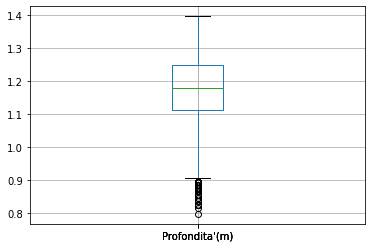

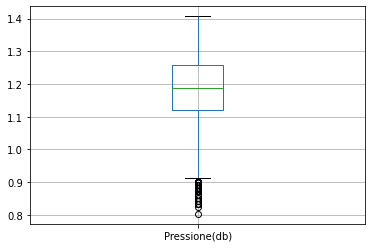

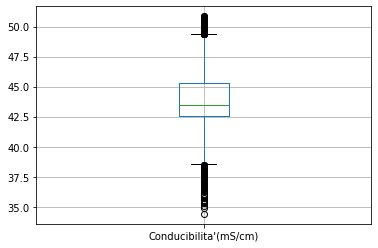

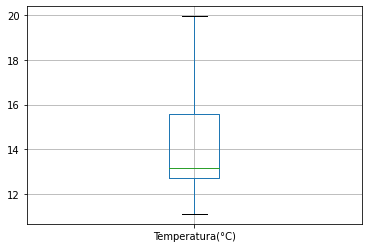

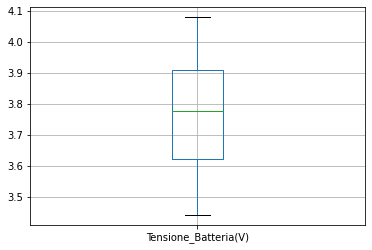

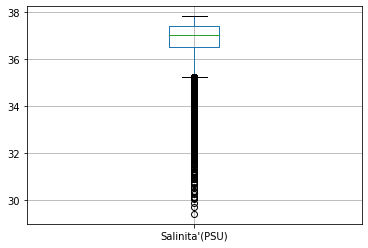

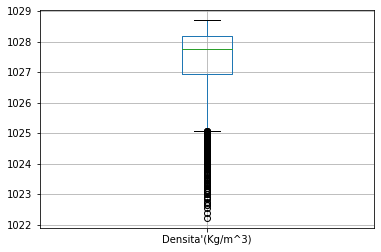

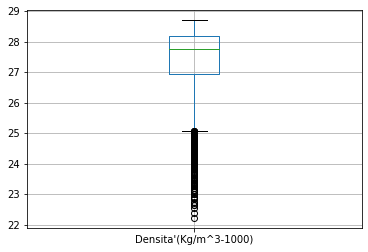

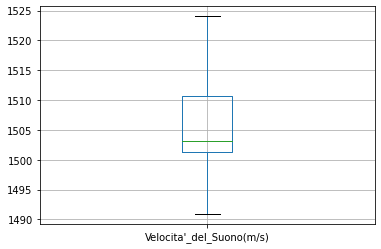

Time


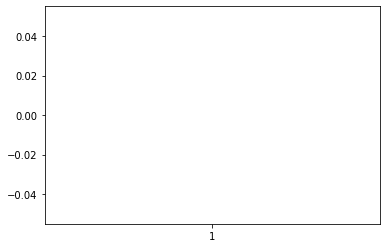

In [6]:
for column in Conducibilita_raw_df.columns:
    try:
        Conducibilita_raw_df[[column]].boxplot()
        plt.show()
    except:
        print(column)

Profondita against Pressione (Perfectly Linear)

<AxesSubplot:xlabel="Profondita'(m)", ylabel='Pressione(db)'>

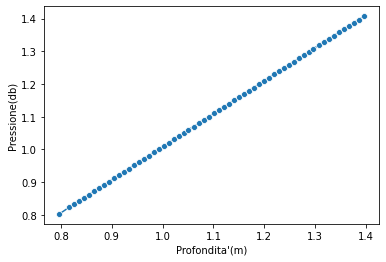

In [7]:
sns.lineplot(data=Conducibilita_raw_df, x="Profondita'(m)", y="Pressione(db)", marker="o")

In [8]:
sm.OLS(Conducibilita_raw_df["Pressione(db)"], Conducibilita_raw_df[["Profondita'(m)"]]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Pressione(db)   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.267e+11
Date:                Sun, 10 Apr 2022   Prob (F-statistic):                        0.00
Time:                        18:00:00   Log-Likelihood:                          49890.
No. Observations:                7398   AIC:                                 -9.978e+04
Df Residuals:                    7397   BIC:                                 -9.977e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Profondita'(m)     1.0081   2.83e-06   3.56e+05      0.000       1.008       1.008
==============================================================================
Omnibus:                     3005.186   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.284
Skew:                           0.135   Prob(JB):                     2.41e-86
Kurtosis:                       1.902   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conducibilita against Salinita & Temperatura (Perfectly Linearly Explained)

In [9]:
sm.OLS(Conducibilita_raw_df["Conducibilita'(mS/cm)"], Conducibilita_raw_df[["Salinita'(PSU)", "Temperatura(°C)"]]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Conducibilita'(mS/cm)   R-squared (uncentered):                   1.000
Model:                               OLS   Adj. R-squared (uncentered):              1.000
Method:                    Least Squares   F-statistic:                          8.931e+07
Date:                   Sun, 10 Apr 2022   Prob (F-statistic):                        0.00
Time:                           18:00:02   Log-Likelihood:                         -1164.3
No. Observations:                   7398   AIC:                                      2333.
Df Residuals:                       7396   BIC:                                      2346.
Df Model:                              2                                                  
Covariance Type:               nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Salinita'(PSU)      0.8018      0.001   1313.583      0.000       0.801       0.803
Temperatura(°C)     1.0261      0.002    652.709      0.000       1.023       1.029
==============================================================================
Omnibus:                     3902.182   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26088.774
Skew:                          -2.506   Prob(JB):                         0.00
Kurtosis:                      10.714   Cond. No.                         20.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Winkler

Winkler contains no anomaly.

In [10]:
anomaly_temp = Winkler_raw_df[((Winkler_raw_df == -9999).sum(axis=1) > 0)]
anomaly_temp

,Data,Ora(UTC),Profondita'(m),Ossigeno(mg/l),Ossigeno(ml/l),Ossigeno(umol/l),Ossigeno(%),Time


In [11]:
Winkler_raw_df.info()
Winkler_raw_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 1 to 19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              19 non-null     object        
 1   Ora(UTC)          19 non-null     object        
 2   Profondita'(m)    19 non-null     float32       
 3   Ossigeno(mg/l)    19 non-null     float32       
 4   Ossigeno(ml/l)    19 non-null     float32       
 5   Ossigeno(umol/l)  19 non-null     float32       
 6   Ossigeno(%)       19 non-null     float32       
 7   Time              19 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float32(5), object(2)
memory usage: 968.0+ bytes


,Profondita'(m),Ossigeno(mg/l),Ossigeno(ml/l),Ossigeno(umol/l),Ossigeno(%)
count,19.0,19.000000,19.000000,19.000000,19.000000
mean,1.0,7.924738,5.551053,247.684204,95.121643
std,0.0,0.409490,0.286490,12.931667,3.164390
min,1.0,7.120000,4.990000,222.000000,89.357002
25%,1.0,7.635000,5.350000,238.500000,92.865002
50%,1.0,8.000000,5.600000,250.000000,95.332001
75%,1.0,8.220000,5.760000,257.000000,97.359001
max,1.0,8.530000,5.980000,267.000000,102.495003


Data
Ora(UTC)


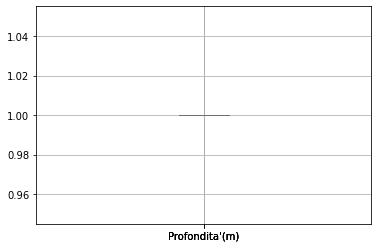

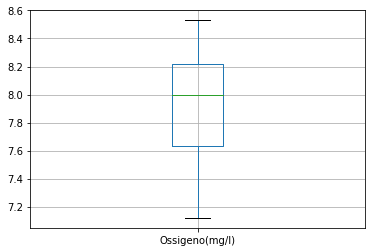

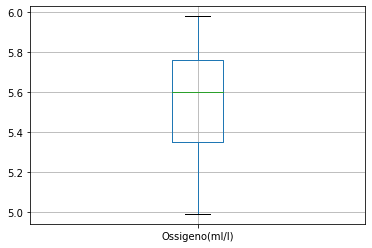

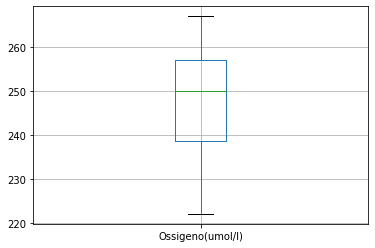

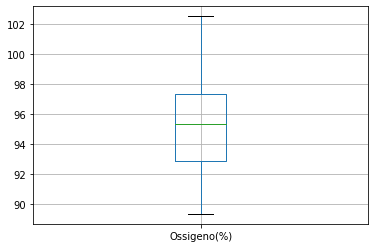

Time


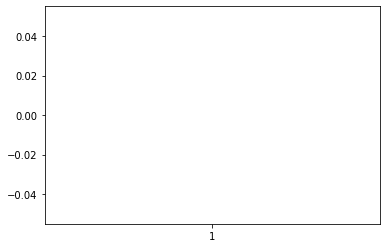

In [12]:
for column in Winkler_raw_df.columns:
    try:
        Winkler_raw_df[[column]].boxplot()
        plt.show()
    except:
        print(column)

### CTD

CTD contains too many anomalies to drop.

<AxesSubplot:title={'center':'Anomaly Proportion by Columns'}>

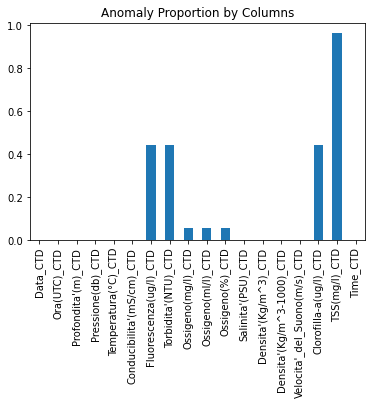

In [24]:
(CTD_raw_df == -9999).mean(axis=0).plot.bar(title="Anomaly Proportion by Columns")

Data
Ora(UTC)


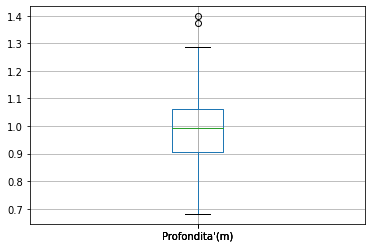

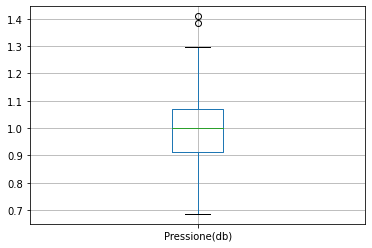

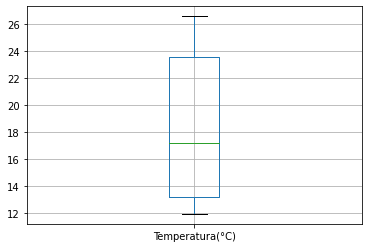

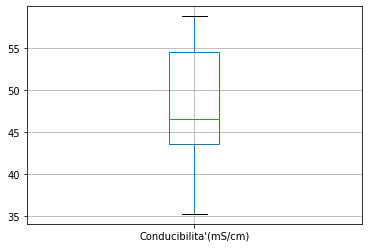

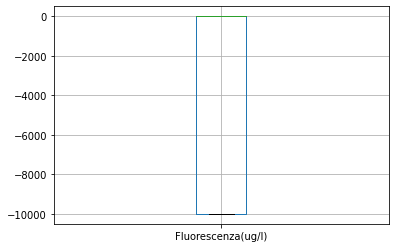

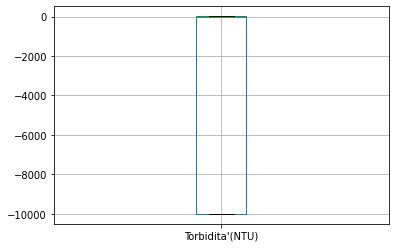

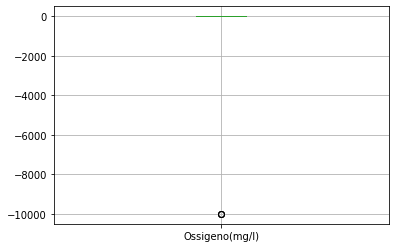

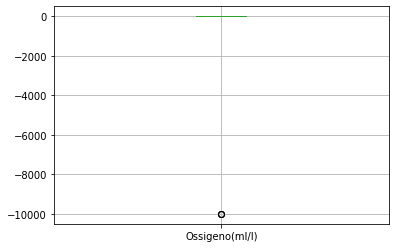

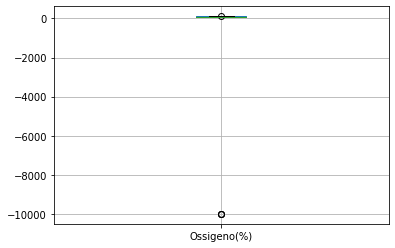

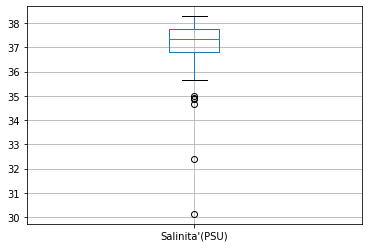

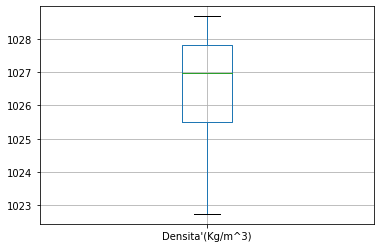

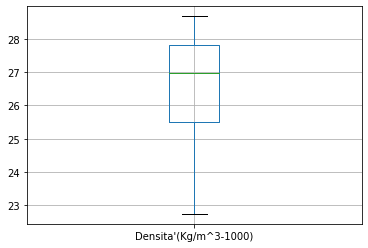

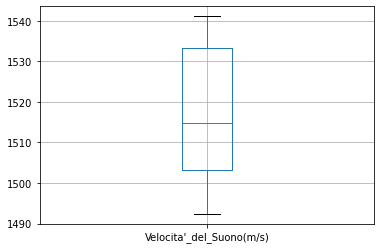

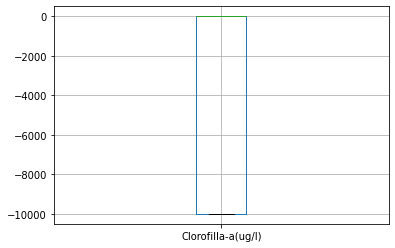

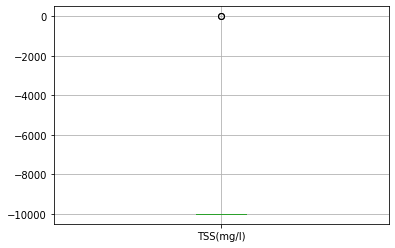

Time


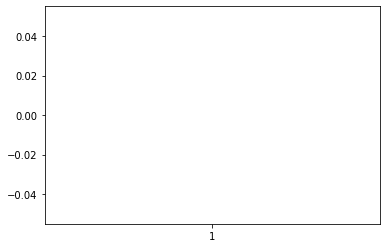

In [14]:
for column in CTD_raw_df.columns:
    try:
        CTD_raw_df[[column]].boxplot()
        plt.show()
    except:
        print(column)

Profondita against Pressione (Perfectly Linear)

<AxesSubplot:xlabel="Profondita'(m)", ylabel='Pressione(db)'>

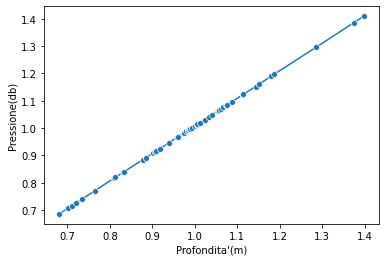

In [15]:
sns.lineplot(data=CTD_raw_df, x="Profondita'(m)", y="Pressione(db)", marker="o")

In [16]:
sm.OLS(CTD_raw_df["Pressione(db)"], CTD_raw_df[["Profondita'(m)"]]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Pressione(db)   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.193e+08
Date:                Sun, 10 Apr 2022   Prob (F-statistic):                   5.57e-189
Time:                        17:32:32   Log-Likelihood:                          362.35
No. Observations:                  54   AIC:                                     -722.7
Df Residuals:                      53   BIC:                                     -720.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Profondita'(m)     1.0081   4.05e-05   2.49e+04      0.000       1.008       1.008
==============================================================================
Omnibus:                        9.089   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                2.768
Skew:                          -0.047   Prob(JB):                        0.251
Kurtosis:                       1.895   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conducibilita against Salinita & Temperatura (Perfectly Linearly Explained)

In [17]:
sm.OLS(CTD_raw_df["Conducibilita'(mS/cm)"], CTD_raw_df[["Salinita'(PSU)", "Temperatura(°C)"]]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Conducibilita'(mS/cm)   R-squared (uncentered):                   1.000
Model:                               OLS   Adj. R-squared (uncentered):              1.000
Method:                    Least Squares   F-statistic:                          3.278e+05
Date:                   Sun, 10 Apr 2022   Prob (F-statistic):                   2.40e-107
Time:                           17:32:32   Log-Likelihood:                         -31.616
No. Observations:                     54   AIC:                                      67.23
Df Residuals:                         52   BIC:                                      71.21
Df Model:                              2                                                  
Covariance Type:               nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Salinita'(PSU)      0.7754      0.006    122.795      0.000       0.763       0.788
Temperatura(°C)     1.0934      0.012     87.888      0.000       1.068       1.118
==============================================================================
Omnibus:                       26.987   Durbin-Watson:                   0.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.285
Skew:                          -1.740   Prob(JB):                     3.99e-10
Kurtosis:                       5.669   Cond. No.                         9.50
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ossigeno

<AxesSubplot:title={'center':'Anomaly Proportion by Columns'}>

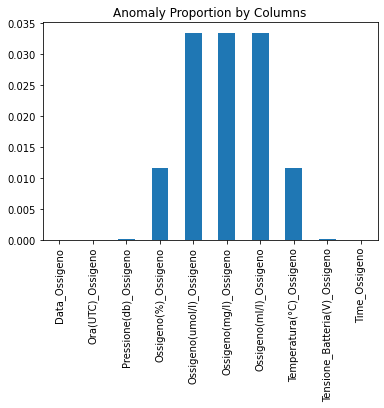

In [22]:
(Ossigeno_raw_df == -9999).mean(axis=0).plot.bar(title="Anomaly Proportion by Columns")

In [19]:
anomaly_temp = Ossigeno_raw_df[((Ossigeno_raw_df == -9999).sum(axis=1) > 0)]
anomaly_temp

,Data,Ora(UTC),Pressione(db),Ossigeno(%),Ossigeno(umol/l),Ossigeno(mg/l),Ossigeno(ml/l),Temperatura(°C),Tensione_Batteria(V),Time
42,2021-10-07,07:00:32,0.525,82.690002,-9999.0,-9999.0,-9999.0,21.639999,4.061,2021-10-07 07:00:32
60,2021-10-07,16:00:32,0.862,90.089996,-9999.0,-9999.0,-9999.0,21.780001,4.099,2021-10-07 16:00:32
124,2021-10-09,00:00:29,0.892,86.900002,-9999.0,-9999.0,-9999.0,21.100000,4.060,2021-10-09 00:00:29
402,2021-10-14,20:00:14,1.001,93.139999,-9999.0,-9999.0,-9999.0,20.000000,3.957,2021-10-14 20:00:14
461,2021-10-16,01:30:11,0.951,89.440002,-9999.0,-9999.0,-9999.0,19.700001,3.912,2021-10-16 01:30:11
...,...,...,...,...,...,...,...,...,...,...
7571,2022-03-30,02:01:05,1.021,97.559998,-9999.0,-9999.0,-9999.0,13.770000,3.435,2022-03-30 02:01:05
7572,2022-03-30,02:30:58,1.021,96.629997,-9999.0,-9999.0,-9999.0,13.740000,3.444,2022-03-30 02:30:58
7575,2022-03-30,04:00:56,1.021,96.889999,-9999.0,-9999.0,-9999.0,13.690000,3.445,2022-03-30 04:00:56
7600,2022-03-30,16:31:06,0.971,97.400002,-9999.0,-9999.0,-9999.0,13.800000,3.448,2022-03-30 16:31:06


In [20]:
try:
    Ossigeno_raw_df.drop(anomaly_temp.index, axis=0, inplace=True)
except:
    pass
Conducibilita_raw_df.info()
Conducibilita_raw_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 1 to 7399
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      7398 non-null   object        
 1   Ora(UTC)                  7398 non-null   object        
 2   Profondita'(m)            7398 non-null   float32       
 3   Pressione(db)             7398 non-null   float32       
 4   Conducibilita'(mS/cm)     7398 non-null   float32       
 5   Temperatura(°C)           7398 non-null   float32       
 6   Tensione_Batteria(V)      7398 non-null   float32       
 7   Salinita'(PSU)            7398 non-null   float32       
 8   Densita'(Kg/m^3)          7398 non-null   float32       
 9   Densita'(Kg/m^3-1000)     7398 non-null   float32       
 10  Velocita'_del_Suono(m/s)  7398 non-null   float32       
 11  Time                      7398 non-null   datetime64[ns]
dtypes: datetime64[ns](1)

,Profondita'(m),Pressione(db),Conducibilita'(mS/cm),Temperatura(°C),Tensione_Batteria(V),Salinita'(PSU),Densita'(Kg/m^3),Densita'(Kg/m^3-1000),Velocita'_del_Suono(m/s)
count,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000
mean,1.166397,1.175836,43.934010,14.115006,3.773206,36.739773,1027.493408,27.492550,1505.726196
std,0.099095,0.099899,2.628942,2.111574,0.179691,1.131359,0.938540,0.938538,6.881653
min,0.797000,0.803000,34.400002,11.110000,3.442000,29.428400,1022.232788,22.232800,1490.918945
25%,1.111000,1.120000,42.590000,12.700000,3.621000,36.544851,1026.940613,26.940650,1501.281860
50%,1.179000,1.189000,43.470001,13.180000,3.777000,37.058899,1027.746765,27.746750,1503.186096
75%,1.249000,1.259000,45.310001,15.600000,3.910000,37.405998,1028.178558,28.178575,1510.707275
max,1.396000,1.407000,50.860001,19.950001,4.079000,37.838501,1028.703735,28.703699,1524.038208


Data
Ora(UTC)


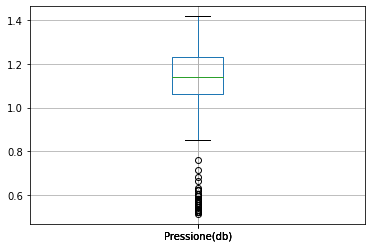

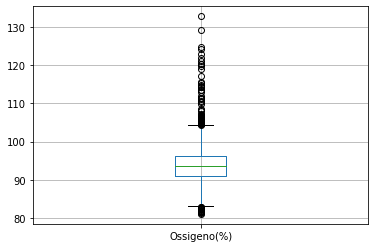

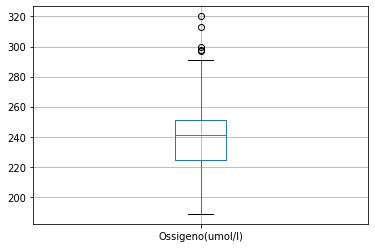

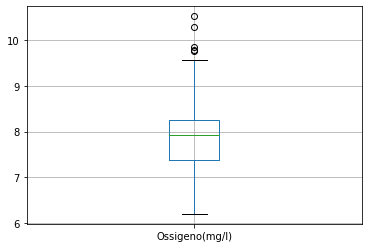

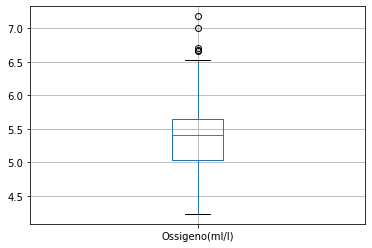

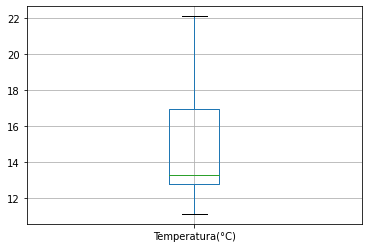

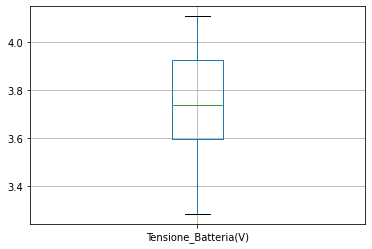

Time


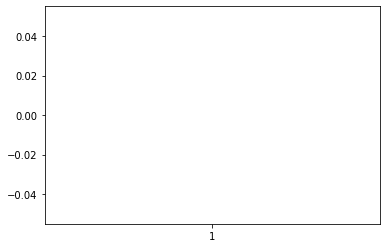

In [21]:
for column in Ossigeno_raw_df.columns:
    try:
        Ossigeno_raw_df[[column]].boxplot()
        plt.show()
    except:
        print(column)

### Time Span of Datasets

In [16]:
CTD_raw_df.columns = map(lambda x: x+"_CTD", CTD_raw_df.columns)
Winkler_raw_df.columns = map(lambda x: x+"_Winkler", Winkler_raw_df.columns)
Ossigeno_raw_df.columns = map(lambda x: x+"_Ossigeno", Ossigeno_raw_df.columns)
Conducibilita_raw_df.columns = map(lambda x: x+"_Conducibilita", Conducibilita_raw_df.columns)

In [21]:
df = [dict(Task="CTD", Start=CTD_raw_df["Data_CTD"].min().strftime(format="%Y-%m-%d"), Finish=CTD_raw_df["Data_CTD"].max().strftime(format="%Y-%m-%d")),
      dict(Task="Winkler", Start=Winkler_raw_df["Data_Winkler"].min().strftime(format="%Y-%m-%d"), Finish=Winkler_raw_df["Data_Winkler"].max().strftime(format="%Y-%m-%d")),
      dict(Task="Ossigeno", Start=Ossigeno_raw_df["Data_Ossigeno"].min().strftime(format="%Y-%m-%d"), Finish=Ossigeno_raw_df["Data_Ossigeno"].max().strftime(format="%Y-%m-%d")),
      dict(Task="Conducibilita", Start=Conducibilita_raw_df["Data_Conducibilita"].min().strftime(format="%Y-%m-%d"), Finish=Conducibilita_raw_df["Data_Conducibilita"].max().strftime(format="%Y-%m-%d"))]
fig = create_gantt(df, title="Time Span of Datasets")
fig.show()

### Sample Rate by Day (not uniform)

/home/3068020/.conda/envs/Syrto/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



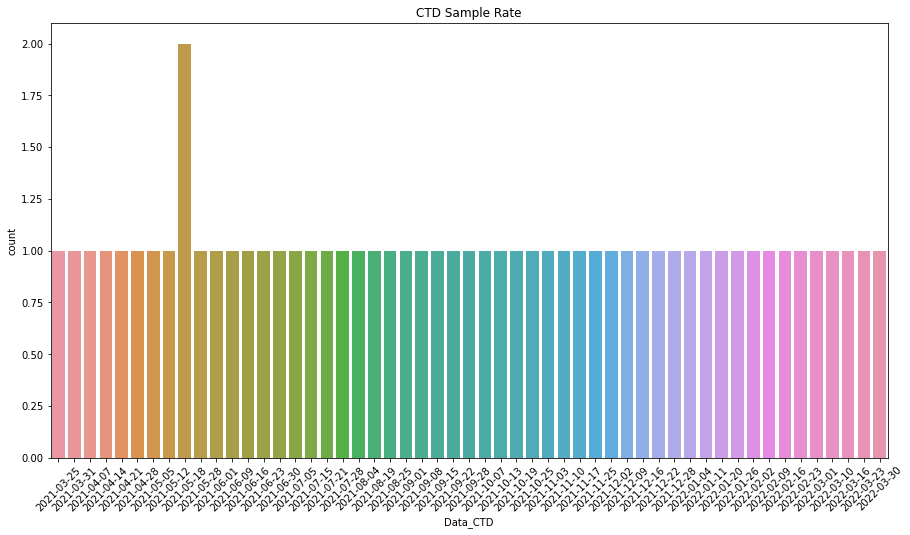

In [23]:
plt.figure(figsize=(15,8))
ax = sns.countplot(CTD_raw_df["Data_CTD"])
ax.set(title="CTD Sample Rate")
ax.xaxis.set_tick_params(rotation=45)

/home/3068020/.conda/envs/Syrto/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



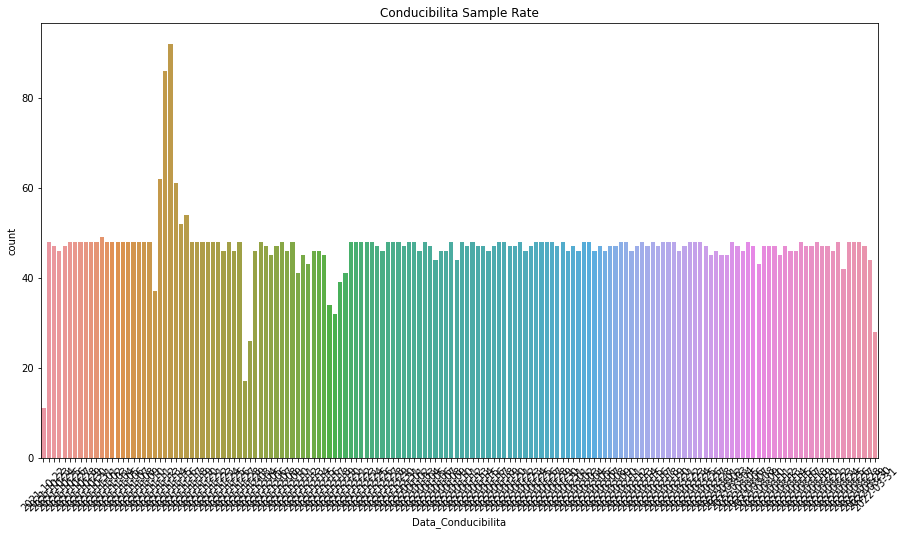

In [24]:
plt.figure(figsize=(15,8))
ax = sns.countplot(Conducibilita_raw_df["Data_Conducibilita"])
ax.set(title="Conducibilita Sample Rate")
ax.xaxis.set_tick_params(rotation=45)

/home/3068020/.conda/envs/Syrto/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



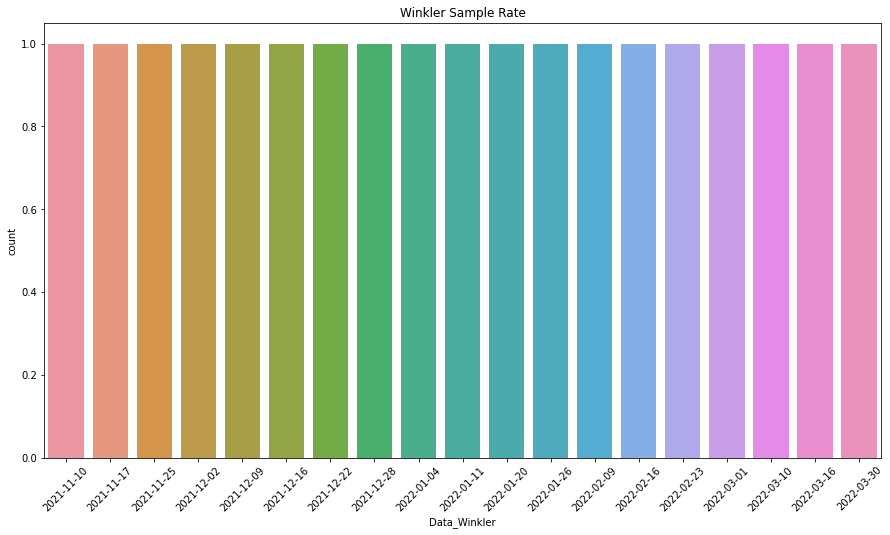

In [25]:
plt.figure(figsize=(15,8))
ax = sns.countplot(Winkler_raw_df["Data_Winkler"])
ax.set(title="Winkler Sample Rate")
ax.xaxis.set_tick_params(rotation=45)


/home/3068020/.conda/envs/Syrto/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



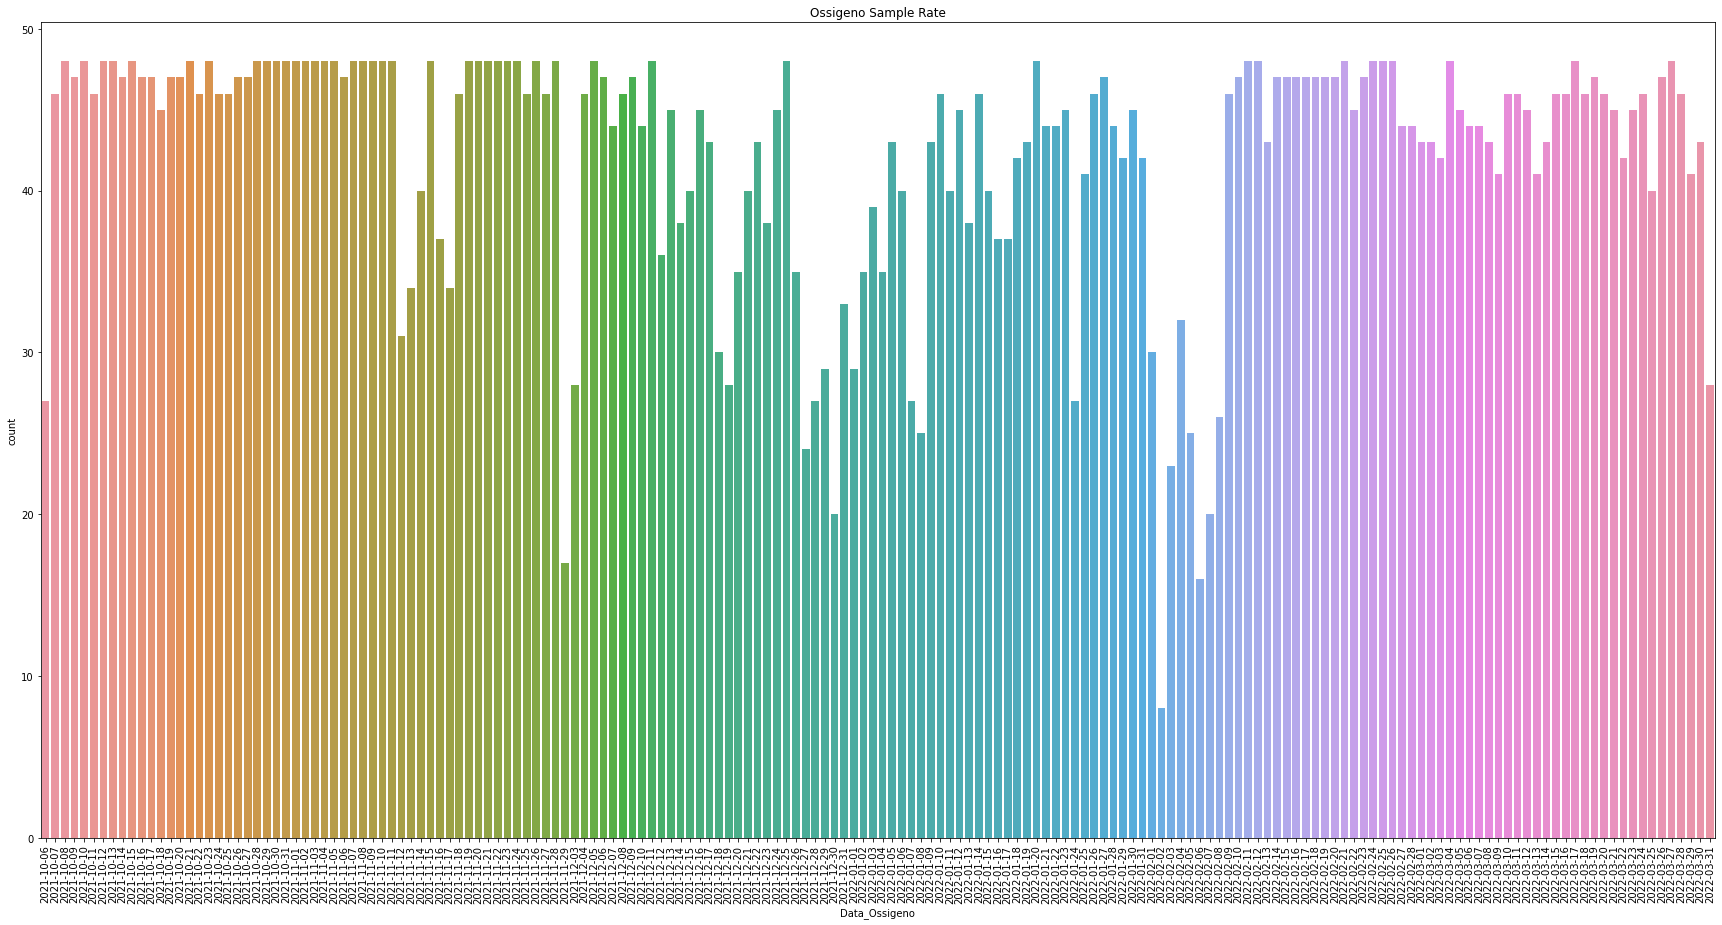

In [26]:
plt.figure(figsize=(30, 15))
ax = sns.countplot(Ossigeno_raw_df["Data_Ossigeno"])
ax.set(title="Ossigeno Sample Rate")
ax.xaxis.set_tick_params(rotation=90)

### Join Data

### Join Data

In [28]:
################### Join ###################


joint_avg_df = (CTD_raw_df.merge(Conducibilita_raw_df, how="left", left_on="Data_CTD", right_on="Data_Conducibilita").groupby("Data_CTD").mean().reset_index()
           .merge(Ossigeno_raw_df, how="left", left_on="Data_CTD", right_on="Data_Ossigeno").groupby("Data_CTD").mean().reset_index()
           .merge(Winkler_raw_df, how="left", left_on="Data_CTD", right_on="Data_Winkler").groupby("Data_CTD").mean())

def merge_minDiff(CTD_raw_df, incoming):
    incoming_df = eval(incoming+"_raw_df")
    temp_df = CTD_raw_df.merge(incoming_df, how="left", left_on="Data_CTD", right_on="Data_" + incoming)
    temp_df["Time_diff"] = (temp_df["Time_CTD"] - temp_df["Time_" + incoming]).abs()
    temp2_df = temp_df.groupby("Data_CTD")["Time_diff"].min().reset_index()
    temp3_df = temp_df.merge(temp2_df, how="right", on=["Data_CTD", "Time_diff"])

    return temp3_df
    
incomings_ls = ["Conducibilita", "Ossigeno", "Winkler"]
joint_min_df = CTD_raw_df

for incoming in incomings_ls:
    joint_min_df = merge_minDiff(joint_min_df, incoming)


In [34]:
joint_df = (CTD_raw_df.merge(Conducibilita_raw_df, how="left", left_on="Data_CTD", right_on="Data_Conducibilita")
           .merge(Ossigeno_raw_df, how="left", left_on="Data_CTD", right_on="Data_Ossigeno")
           .merge(Winkler_raw_df, how="left", left_on="Data_CTD", right_on="Data_Winkler"))

### Preliminary Analysis

At 30/03/2022, CTD is probed at depth 0.681, while Conductivity is measured at other depths. A predicted uncertainties at depth 0.681 has to be computed to decide the snesor functionality.

In [51]:
temp_dt = datetime.date(2022, 3, 30)
temp_dt

datetime.date(2022, 3, 30)

In [52]:
joint_df[joint_df["Data_CTD"] == temp_dt]["Profondita'(m)_CTD"].unique()

array([0.681], dtype=float32)

In [53]:
joint_df[joint_df["Data_CTD"] == temp_dt]["Profondita'(m)_Conducibilita"].unique()

array([1.091, 1.081, 1.051, 1.061, 1.071, 1.023, 1.013, 1.042, 1.033,
       1.003, 0.983, 0.993, 0.973, 0.963, 0.953, 0.943], dtype=float32)

In [ ]:
# sns.lineplot(joint_avg_df.index, joint_avg_df["Conducibilita'(mS/cm)_CTD"] - joint_avg_df["Conducibilita'(mS/cm)_Conducibilita"]).set(ylabel="Diff Conducibilita", title="CTD - Conducibilita by average")

# sns.lineplot(joint_avg_df.index, joint_avg_df["Conducibilita'(mS/cm)_CTD"] - joint_avg_df["Conducibilita'(mS/cm)_Conducibilita"]).set(ylabel="Diff Conducibilita", title="CTD - Conducibilita by average")